# Concensus NMF running script

#### similar as described by cNMF team on github: https://github.com/dylkot/cNMF/blob/master/Tutorials/analyze_pbmc_example_data.ipynb

In [11]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
from scipy.io import mmread
import scipy.sparse as sp
import matplotlib.pyplot as plt
#from IPython.display import Imaged
import scanpy as sc
from cnmf import cNMF
import anndata as ad

np.random.seed(42)

In [67]:
dsp_count = pd.read_csv('../../dsp_related/final_data/microdsp_q3Counts.csv')
dsp_count.shape

(350, 8895)

In [69]:
dsp_count2 = dsp_count.iloc[:,1:]

# first remove the negative control probes
dsp_count2 = dsp_count2[dsp_count2.columns.drop(list(dsp_count2.filter(regex='Negative')))]

# then remove bacteria genes since in this scenario we dont need to condiser them
dsp_count2 = dsp_count2.drop(['Bac', 'Firm', 'Pro', 'PAN'], axis=1)

dsp_count2.shape

(350, 8889)

In [96]:
meta = pd.read_table('../../dsp_related/final_data/meta_analys_use.txt',sep = '\t').dropna()
meta.shape#.head()
#meta = read.table("../../dsp_related/final_data/meta_analys_use.txt", sep = '\t', header = T, na.strings=c("","NA"))

(318, 11)

In [98]:
dsp_count

,Unnamed: 0,0610009B22Rik,0610010K14Rik,0610012G03Rik,0610030E20Rik,0610040J01Rik,1110004F10Rik,Eola1,1110025L11Rik,1110032A03Rik,...,Iglc1,Trac,Trgc1,Bac,Firm,PAN,Pro,Custom Negative Set 2,Muc2_CTL,Vil1_CTL
0,DSP-1001660012221-E-A02,19.755585,7.525937,4.703711,14.111132,6.585195,13.170390,13.170390,6.585195,13.170390,...,13.170390,4.703711,8.466679,4316.799962,673.510308,46004.172037,126.518677,19.549596,17.538627,11.753002
1,DSP-1001660012221-E-A03,6.988370,7.425143,12.229648,5.241278,4.367731,9.172236,9.609009,4.367731,10.045782,...,4.367731,1.747093,10.045782,52.059988,25.866326,287.396723,24.763394,15.919426,27.953481,22.933593
2,DSP-1001660012221-E-A04,15.287060,12.229648,6.114824,13.248785,6.114824,6.114824,6.114824,12.229648,12.229648,...,9.172236,4.076549,8.153099,2648.291202,508.119420,29047.451789,63.374369,14.209563,12.797381,12.397198
3,DSP-1001660012221-E-A05,5.128562,9.468114,9.862619,4.339552,8.284600,7.495591,5.917572,4.339552,6.706581,...,5.523067,2.367029,7.495591,152.466388,53.753984,1741.738549,23.373103,16.498269,32.347787,17.801092
4,DSP-1001660012221-E-A06,6.670717,9.264885,13.341434,2.223572,8.523694,7.782503,5.188335,3.705954,5.929526,...,2.594168,0.741191,2.594168,66.192009,21.719406,372.077769,12.339597,14.323062,50.549878,18.913322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,DSP-1001660012833-A-H08,10.482555,17.470925,12.229648,8.735463,10.482555,15.723833,1.747093,1.747093,3.494185,...,3.494185,1.747093,5.241278,4024.514615,5999.512308,480993.794882,133.938448,18.816161,42.183473,17.144567
346,DSP-1001660012833-A-H09,12.229648,9.172236,3.057412,3.057412,3.057412,3.057412,3.057412,3.057412,3.057412,...,3.057412,9.172236,6.114824,53.373355,147.253039,5222.059609,30.034707,10.661374,58.104939,19.760983
347,DSP-1001660012833-A-H10,7.590816,10.542800,9.277664,2.951984,10.121088,12.651360,6.325680,3.795408,6.325680,...,2.108560,2.108560,10.964512,38.065014,103.775794,5515.992868,20.587672,12.688284,147.973017,23.937963
348,DSP-1001660012833-A-H11,2.445930,31.797084,7.337789,14.675577,4.891859,17.121507,2.445930,4.891859,2.445930,...,7.337789,4.891859,7.337789,699.049136,8584.026789,781440.251107,171.696246,23.498187,41.936044,26.905225


In [71]:
dsp = ad.AnnData(
    dsp_count2.to_numpy(), dtype=np.float32
)
dsp

save = '../data/counts_dsp.h5ad'
sc.write(save, dsp)

In [72]:
numiter=200 # Number of NMF replicates. Set this to a larger value ~200 for real data. We set this to a relatively low value here for illustration at a faster speed
numhvgenes=8000 ## Number of over-dispersed genes to use for running the actual factorizations

## Results will be saved to [output_directory]/[run_name] which in this example is example_PBMC/cNMF/pbmc_cNMF
output_directory = '../data/cnmf_res1/'
if not os.path.exists(output_directory):
    os.mkdir(output_directory)
run_name = 'cnmf_res1'

## Specify the Ks to use as a space separated list in this case "5 6 7 8 9 10"
K = ' '.join([str(i) for i in range(20,41, 5)])

seed = 42 ## Specify a seed pseudorandom number generation for reproducibility

In [73]:
K

'20 25 30 35 40'

In [74]:
## Initialize the cnmf object that will be used to run analyses
cnmf_obj = cNMF(output_dir=output_directory, name=run_name)

In [75]:
## Prepare the data, I.e. subset to 2000 high-variance genes, and variance normalize
cnmf_obj.prepare(counts_fn=save, components=range(20,41, 5),
                 n_iter=numiter, seed=seed, num_highvar_genes=numhvgenes)

In [76]:
## Specify that the jobs are being distributed over a single worker (total_workers=1) and then launch that worker
cnmf_obj.factorize(worker_i=0, total_workers=1)

[Worker 0]. Starting task 0.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 1.
[Worker 0]. Starting task 2.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 3.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 4.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 5.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 6.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 7.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 8.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 9.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 10.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 11.
[Worker 0]. Starting task 12.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 13.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 14.
[Worker 0]. Starting task 15.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 16.
[Worker 0]. Starting task 17.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 18.
[Worker 0]. Starting task 19.
[Worker 0]. Starting task 20.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 21.
[Worker 0]. Starting task 22.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 23.
[Worker 0]. Starting task 24.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 25.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 26.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 27.
[Worker 0]. Starting task 28.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 29.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 30.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 31.
[Worker 0]. Starting task 32.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 33.
[Worker 0]. Starting task 34.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 35.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 36.
[Worker 0]. Starting task 37.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 38.
[Worker 0]. Starting task 39.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 40.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 41.
[Worker 0]. Starting task 42.
[Worker 0]. Starting task 43.
[Worker 0]. Starting task 44.
[Worker 0]. Starting task 45.
[Worker 0]. Starting task 46.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 47.
[Worker 0]. Starting task 48.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 49.
[Worker 0]. Starting task 50.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 51.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 52.
[Worker 0]. Starting task 53.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 54.
[Worker 0]. Starting task 55.
[Worker 0]. Starting task 56.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 57.
[Worker 0]. Starting task 58.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 59.
[Worker 0]. Starting task 60.
[Worker 0]. Starting task 61.
[Worker 0]. Starting task 62.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 63.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 64.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 65.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 66.
[Worker 0]. Starting task 67.
[Worker 0]. Starting task 68.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 69.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 70.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 71.
[Worker 0]. Starting task 72.
[Worker 0]. Starting task 73.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 74.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 75.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 76.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 77.
[Worker 0]. Starting task 78.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 79.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 80.
[Worker 0]. Starting task 81.
[Worker 0]. Starting task 82.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 83.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 84.
[Worker 0]. Starting task 85.
[Worker 0]. Starting task 86.
[Worker 0]. Starting task 87.
[Worker 0]. Starting task 88.
[Worker 0]. Starting task 89.
[Worker 0]. Starting task 90.
[Worker 0]. Starting task 91.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 92.
[Worker 0]. Starting task 93.
[Worker 0]. Starting task 94.
[Worker 0]. Starting task 95.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 96.
[Worker 0]. Starting task 97.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 98.
[Worker 0]. Starting task 99.
[Worker 0]. Starting task 100.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 101.
[Worker 0]. Starting task 102.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 103.
[Worker 0]. Starting task 104.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 105.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 106.
[Worker 0]. Starting task 107.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 108.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 109.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 110.
[Worker 0]. Starting task 111.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 112.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 113.
[Worker 0]. Starting task 114.
[Worker 0]. Starting task 115.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 116.
[Worker 0]. Starting task 117.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 118.
[Worker 0]. Starting task 119.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 120.
[Worker 0]. Starting task 121.
[Worker 0]. Starting task 122.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 123.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 124.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 125.
[Worker 0]. Starting task 126.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 127.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 128.
[Worker 0]. Starting task 129.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 130.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 131.
[Worker 0]. Starting task 132.
[Worker 0]. Starting task 133.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 134.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 135.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 136.
[Worker 0]. Starting task 137.
[Worker 0]. Starting task 138.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 139.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 140.
[Worker 0]. Starting task 141.
[Worker 0]. Starting task 142.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 143.
[Worker 0]. Starting task 144.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 145.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 146.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 147.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 148.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 149.
[Worker 0]. Starting task 150.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 151.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 152.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 153.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 154.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 155.
[Worker 0]. Starting task 156.
[Worker 0]. Starting task 157.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 158.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 159.
[Worker 0]. Starting task 160.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 161.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 162.
[Worker 0]. Starting task 163.
[Worker 0]. Starting task 164.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 165.
[Worker 0]. Starting task 166.
[Worker 0]. Starting task 167.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 168.
[Worker 0]. Starting task 169.
[Worker 0]. Starting task 170.
[Worker 0]. Starting task 171.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 172.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 173.
[Worker 0]. Starting task 174.
[Worker 0]. Starting task 175.
[Worker 0]. Starting task 176.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 177.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 178.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 179.
[Worker 0]. Starting task 180.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 181.
[Worker 0]. Starting task 182.
[Worker 0]. Starting task 183.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 184.
[Worker 0]. Starting task 185.
[Worker 0]. Starting task 186.
[Worker 0]. Starting task 187.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 188.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 189.
[Worker 0]. Starting task 190.
[Worker 0]. Starting task 191.
[Worker 0]. Starting task 192.
[Worker 0]. Starting task 193.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 194.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 195.
[Worker 0]. Starting task 196.
[Worker 0]. Starting task 197.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 198.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 199.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 200.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 201.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 202.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 203.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 204.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 205.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 206.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 207.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 208.
[Worker 0]. Starting task 209.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 210.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 211.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 212.
[Worker 0]. Starting task 213.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 214.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 215.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 216.
[Worker 0]. Starting task 217.
[Worker 0]. Starting task 218.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 219.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 220.
[Worker 0]. Starting task 221.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 222.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 223.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 224.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 225.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 226.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 227.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 228.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 229.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 230.
[Worker 0]. Starting task 231.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 232.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 233.
[Worker 0]. Starting task 234.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 235.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 236.
[Worker 0]. Starting task 237.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 238.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 239.
[Worker 0]. Starting task 240.
[Worker 0]. Starting task 241.
[Worker 0]. Starting task 242.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 243.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 244.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 245.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 246.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 247.
[Worker 0]. Starting task 248.
[Worker 0]. Starting task 249.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 250.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 251.
[Worker 0]. Starting task 252.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 253.
[Worker 0]. Starting task 254.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 255.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 256.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 257.
[Worker 0]. Starting task 258.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 259.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 260.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 261.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 262.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 263.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 264.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 265.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 266.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 267.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 268.
[Worker 0]. Starting task 269.
[Worker 0]. Starting task 270.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 271.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 272.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 273.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 274.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 275.
[Worker 0]. Starting task 276.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 277.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 278.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 279.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 280.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 281.
[Worker 0]. Starting task 282.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 283.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 284.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 285.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 286.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 287.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 288.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 289.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 290.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 291.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 292.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 293.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 294.
[Worker 0]. Starting task 295.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 296.
[Worker 0]. Starting task 297.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 298.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 299.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 300.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 301.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 302.
[Worker 0]. Starting task 303.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 304.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 305.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 306.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 307.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 308.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 309.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 310.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 311.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 312.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 313.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 314.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 315.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 316.
[Worker 0]. Starting task 317.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 318.
[Worker 0]. Starting task 319.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 320.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 321.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 322.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 323.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 324.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 325.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 326.
[Worker 0]. Starting task 327.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 328.
[Worker 0]. Starting task 329.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 330.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 331.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 332.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 333.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 334.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 335.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 336.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 337.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 338.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 339.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 340.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 341.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 342.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 343.
[Worker 0]. Starting task 344.
[Worker 0]. Starting task 345.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 346.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 347.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 348.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 349.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 350.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 351.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 352.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 353.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 354.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 355.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 356.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 357.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 358.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 359.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 360.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 361.
[Worker 0]. Starting task 362.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 363.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 364.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 365.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 366.
[Worker 0]. Starting task 367.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 368.
[Worker 0]. Starting task 369.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 370.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 371.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 372.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 373.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 374.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 375.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 376.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 377.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 378.
[Worker 0]. Starting task 379.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 380.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 381.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 382.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 383.
[Worker 0]. Starting task 384.
[Worker 0]. Starting task 385.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 386.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 387.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 388.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 389.
[Worker 0]. Starting task 390.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 391.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 392.
[Worker 0]. Starting task 393.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 394.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 395.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 396.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 397.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 398.
[Worker 0]. Starting task 399.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 400.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 401.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 402.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 403.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 404.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 405.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 406.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 407.
[Worker 0]. Starting task 408.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 409.
[Worker 0]. Starting task 410.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 411.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 412.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 413.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 414.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 415.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 416.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 417.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 418.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 419.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 420.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 421.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 422.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 423.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 424.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 425.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 426.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 427.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 428.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 429.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 430.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 431.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 432.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 433.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 434.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 435.
[Worker 0]. Starting task 436.
[Worker 0]. Starting task 437.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 438.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 439.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 440.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 441.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 442.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 443.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 444.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 445.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 446.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 447.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 448.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 449.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 450.
[Worker 0]. Starting task 451.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 452.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 453.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 454.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 455.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 456.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 457.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 458.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 459.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 460.
[Worker 0]. Starting task 461.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 462.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 463.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 464.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 465.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 466.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 467.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 468.
[Worker 0]. Starting task 469.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 470.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 471.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 472.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 473.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 474.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 475.
[Worker 0]. Starting task 476.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 477.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 478.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 479.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 480.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 481.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 482.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 483.
[Worker 0]. Starting task 484.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 485.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 486.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 487.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 488.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 489.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 490.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 491.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 492.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 493.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 494.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 495.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 496.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 497.
[Worker 0]. Starting task 498.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 499.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 500.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 501.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 502.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 503.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 504.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 505.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 506.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 507.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 508.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 509.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 510.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 511.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 512.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 513.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 514.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 515.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 516.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 517.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 518.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 519.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 520.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 521.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 522.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 523.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 524.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 525.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 526.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 527.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 528.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 529.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 530.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 531.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 532.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 533.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 534.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 535.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 536.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 537.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 538.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 539.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 540.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 541.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 542.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 543.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 544.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 545.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 546.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 547.
[Worker 0]. Starting task 548.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 549.
[Worker 0]. Starting task 550.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 551.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 552.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 553.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 554.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 555.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 556.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 557.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 558.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 559.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 560.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 561.
[Worker 0]. Starting task 562.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 563.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 564.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 565.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 566.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 567.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 568.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 569.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 570.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 571.
[Worker 0]. Starting task 572.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 573.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 574.
[Worker 0]. Starting task 575.
[Worker 0]. Starting task 576.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 577.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 578.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 579.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 580.
[Worker 0]. Starting task 581.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 582.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 583.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 584.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 585.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 586.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 587.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 588.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 589.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 590.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 591.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 592.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 593.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 594.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 595.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 596.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 597.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 598.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 599.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 600.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 601.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 602.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 603.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 604.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 605.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 606.
[Worker 0]. Starting task 607.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 608.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 609.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 610.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 611.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 612.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 613.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 614.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 615.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 616.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 617.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 618.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 619.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 620.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 621.
[Worker 0]. Starting task 622.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 623.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 624.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 625.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 626.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 627.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 628.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 629.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 630.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 631.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 632.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 633.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 634.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 635.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 636.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 637.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 638.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 639.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 640.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 641.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 642.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 643.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 644.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 645.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 646.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 647.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 648.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 649.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 650.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 651.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 652.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 653.
[Worker 0]. Starting task 654.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 655.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 656.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 657.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 658.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 659.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 660.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 661.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 662.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 663.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 664.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 665.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 666.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 667.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 668.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 669.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 670.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 671.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 672.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 673.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 674.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 675.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 676.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 677.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 678.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 679.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 680.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 681.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 682.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 683.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 684.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 685.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 686.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 687.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 688.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 689.
[Worker 0]. Starting task 690.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 691.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 692.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 693.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 694.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 695.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 696.
[Worker 0]. Starting task 697.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 698.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 699.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 700.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 701.
[Worker 0]. Starting task 702.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 703.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 704.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 705.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 706.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 707.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 708.
[Worker 0]. Starting task 709.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 710.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 711.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 712.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 713.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 714.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 715.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 716.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 717.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 718.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 719.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 720.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 721.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 722.
[Worker 0]. Starting task 723.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 724.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 725.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 726.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 727.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 728.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 729.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 730.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 731.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 732.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 733.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 734.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 735.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 736.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 737.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 738.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 739.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 740.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 741.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 742.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 743.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 744.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 745.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 746.
[Worker 0]. Starting task 747.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 748.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 749.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 750.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 751.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 752.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 753.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 754.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 755.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 756.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 757.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 758.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 759.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 760.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 761.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 762.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 763.
[Worker 0]. Starting task 764.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 765.
[Worker 0]. Starting task 766.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 767.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 768.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 769.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 770.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 771.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 772.
[Worker 0]. Starting task 773.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 774.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 775.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 776.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 777.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 778.
[Worker 0]. Starting task 779.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 780.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 781.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 782.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 783.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 784.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 785.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 786.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 787.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 788.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 789.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 790.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 791.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 792.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 793.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 794.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 795.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 796.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 797.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 798.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 799.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 800.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 801.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 802.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 803.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 804.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 805.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 806.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 807.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 808.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 809.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 810.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 811.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 812.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 813.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 814.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 815.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 816.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 817.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 818.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 819.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 820.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 821.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 822.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 823.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 824.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 825.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 826.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 827.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 828.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 829.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 830.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 831.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 832.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 833.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 834.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 835.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 836.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 837.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 838.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 839.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 840.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 841.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 842.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 843.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 844.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 845.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 846.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 847.
[Worker 0]. Starting task 848.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 849.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 850.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 851.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 852.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 853.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 854.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 855.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 856.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 857.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 858.
[Worker 0]. Starting task 859.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 860.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 861.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 862.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 863.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 864.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 865.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 866.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 867.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 868.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 869.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 870.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 871.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 872.
[Worker 0]. Starting task 873.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 874.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 875.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 876.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 877.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 878.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 879.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 880.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 881.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 882.
[Worker 0]. Starting task 883.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 884.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 885.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 886.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 887.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 888.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 889.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 890.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 891.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 892.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 893.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 894.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 895.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 896.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 897.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 898.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 899.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 900.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 901.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 902.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 903.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 904.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 905.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 906.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 907.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 908.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 909.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 910.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 911.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 912.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 913.
[Worker 0]. Starting task 914.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 915.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 916.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 917.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 918.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 919.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 920.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 921.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 922.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 923.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 924.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 925.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 926.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 927.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 928.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 929.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 930.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 931.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 932.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 933.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 934.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 935.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 936.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 937.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 938.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 939.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 940.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 941.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 942.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 943.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 944.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 945.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 946.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 947.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 948.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 949.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 950.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 951.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 952.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 953.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 954.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 955.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 956.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 957.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 958.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 959.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 960.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 961.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 962.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 963.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 964.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 965.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 966.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 967.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 968.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 969.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 970.
[Worker 0]. Starting task 971.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 972.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 973.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 974.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 975.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 976.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 977.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 978.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 979.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 980.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 981.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 982.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 983.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 984.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 985.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 986.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 987.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 988.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 989.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 990.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 991.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 992.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 993.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 994.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 995.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 996.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 997.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 998.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


[Worker 0]. Starting task 999.


/Users/bokaizhu/anaconda3/envs/cnmf_env/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [77]:
cnmf_obj.combine()

Combining factorizations for k=20.
Combining factorizations for k=25.
Combining factorizations for k=30.
Combining factorizations for k=35.
Combining factorizations for k=40.


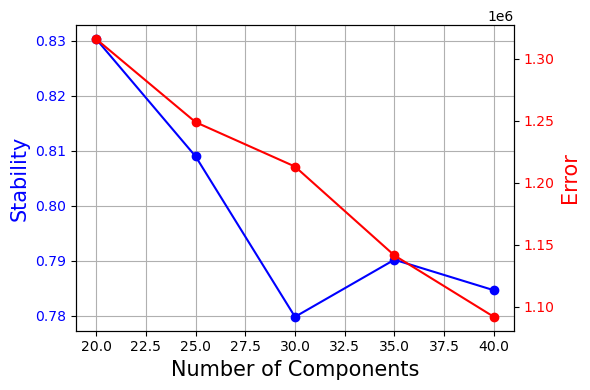

In [78]:
cnmf_obj.k_selection_plot(close_fig=False)

In [79]:
selected_K = 35
density_threshold = 2.00

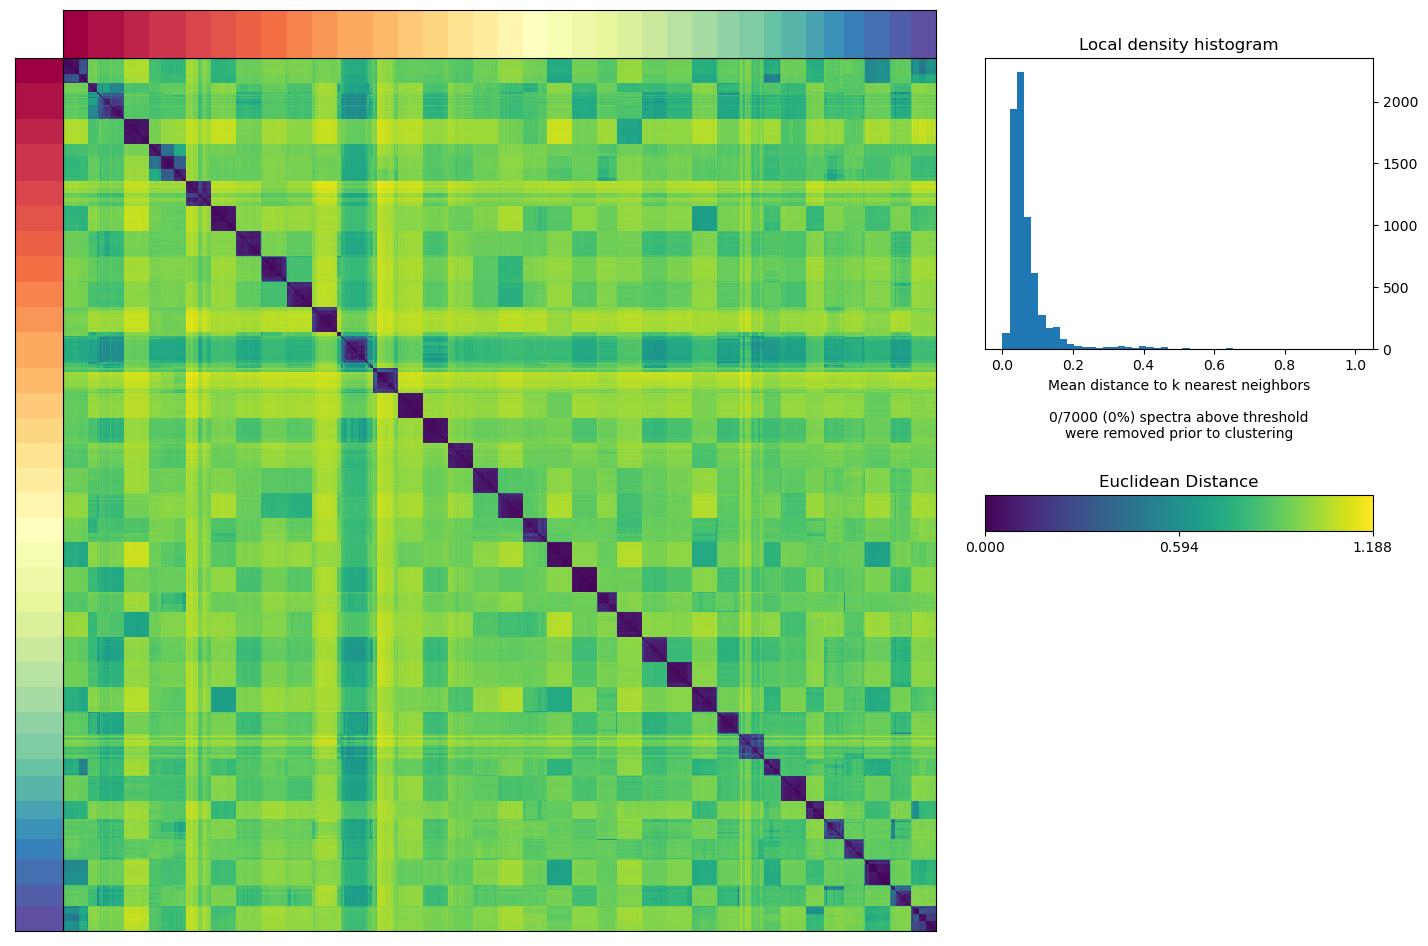

In [80]:
cnmf_obj.consensus(k=selected_K, density_threshold=density_threshold, show_clustering=True, close_clustergram_fig=False)


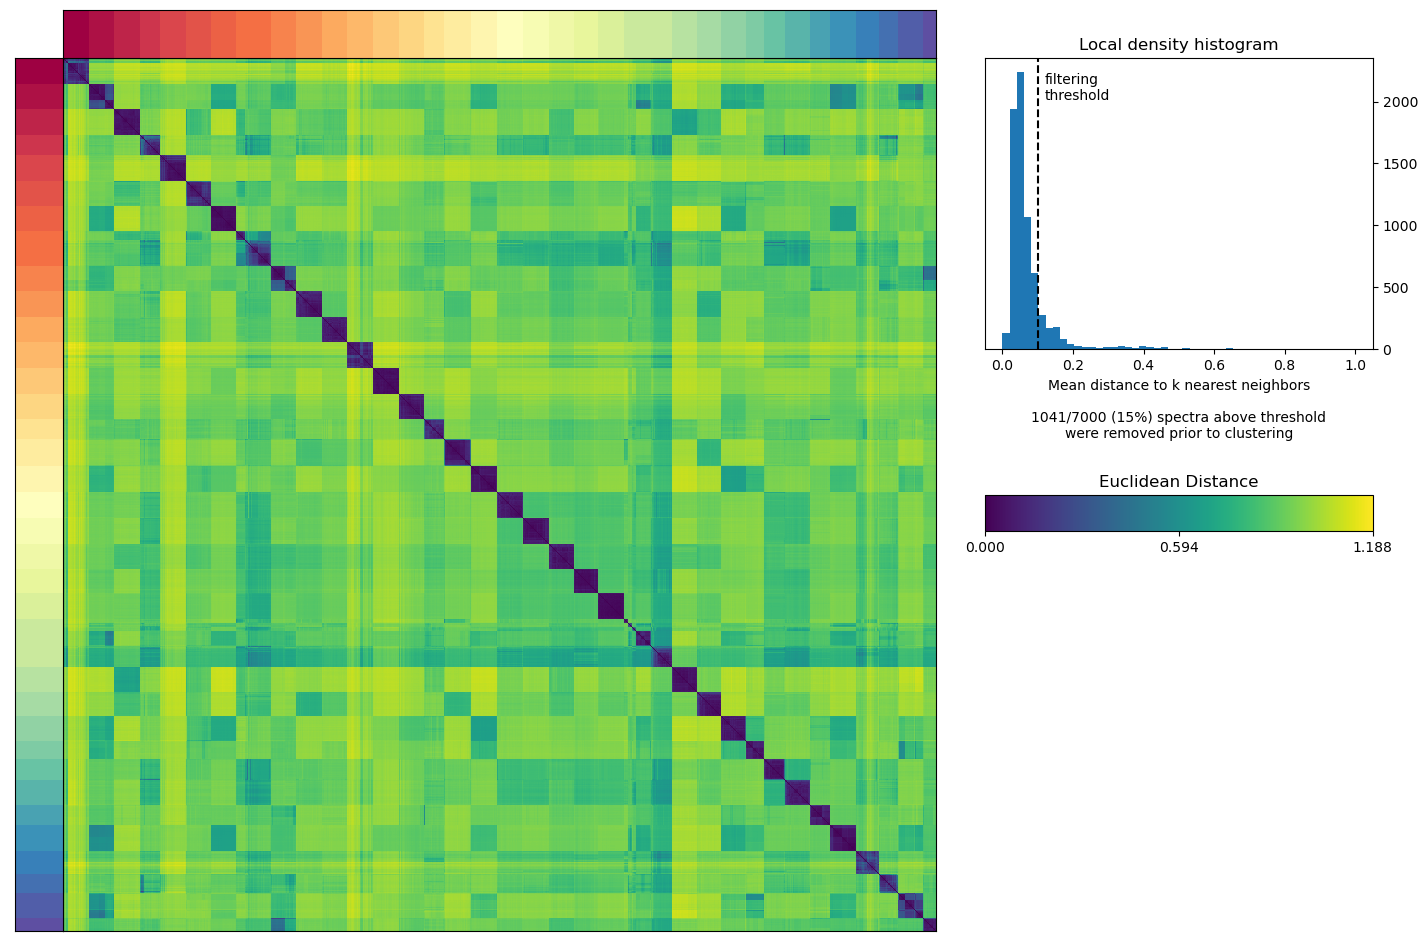

In [81]:
density_threshold = 0.10
cnmf_obj.consensus(k=selected_K, density_threshold=density_threshold, show_clustering=True, close_clustergram_fig=False)


Load cnmf results??

In [87]:
usage_norm, gep_scores, gep_tpm, topgenes = cnmf_obj.load_results(K=selected_K, density_threshold=density_threshold)
usage_norm.columns = ['Usage_%d' % i for i in usage_norm.columns]

In [101]:
usage_norm.index = dsp_count.iloc[:,0]
usage_norm

,Usage_1,Usage_2,Usage_3,Usage_4,Usage_5,Usage_6,Usage_7,Usage_8,Usage_9,Usage_10,...,Usage_26,Usage_27,Usage_28,Usage_29,Usage_30,Usage_31,Usage_32,Usage_33,Usage_34,Usage_35
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
DSP-1001660012221-E-A02,0.034481,0.001244,0.033725,0.284686,0.000000,0.006390,0.023175,0.000898,0.018133,0.004461,...,0.040789,0.002895,0.028021,0.000193,0.013957,0.004245,0.015444,0.011965,0.012141,0.009093
DSP-1001660012221-E-A03,0.011853,0.121502,0.133660,0.001875,0.000000,0.026670,0.063856,0.087031,0.358201,0.009394,...,0.005907,0.005296,0.010287,0.010262,0.002087,0.005165,0.005169,0.000000,0.012459,0.002109
DSP-1001660012221-E-A04,0.000000,0.000000,0.029587,0.276604,0.004867,0.000000,0.000000,0.014028,0.012592,0.010171,...,0.000000,0.015361,0.000000,0.037859,0.000000,0.006466,0.000000,0.000000,0.016776,0.000000
DSP-1001660012221-E-A05,0.058374,0.138392,0.055982,0.006398,0.000000,0.016651,0.000047,0.095512,0.058963,0.018970,...,0.001029,0.006860,0.007026,0.020180,0.002242,0.022405,0.004016,0.003700,0.014263,0.006694
DSP-1001660012221-E-A06,0.031937,0.212947,0.043226,0.000000,0.000000,0.106539,0.000000,0.105454,0.062886,0.004998,...,0.000278,0.000000,0.000000,0.013949,0.001964,0.019646,0.000000,0.002002,0.014379,0.003708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DSP-1001660012833-A-H08,0.048584,0.046037,0.012321,0.074961,0.005208,0.000000,0.016589,0.015010,0.002757,0.003497,...,0.016699,0.010638,0.000000,0.017656,0.000000,0.002776,0.008906,0.005982,0.005219,0.004542
DSP-1001660012833-A-H09,0.286618,0.227253,0.000000,0.000000,0.052782,0.000000,0.008039,0.000000,0.022771,0.007125,...,0.000000,0.080502,0.013116,0.000000,0.000000,0.046722,0.000000,0.000000,0.026060,0.002682
DSP-1001660012833-A-H10,0.180723,0.419423,0.000000,0.003198,0.106094,0.000000,0.059260,0.053112,0.026646,0.009807,...,0.003915,0.003836,0.000000,0.000000,0.000000,0.024780,0.000000,0.002502,0.000000,0.000000


In [102]:
usage_norm.to_csv('../data/cnmf35_usage.csv')

In [95]:
gep_scores.shape

(8889, 35)

In [90]:
topgenes.head(10)

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,3405,7583,5985,817,1486,3331,3089,8282,7765,8651,...,243,1519,5216,8075,6223,3230,7939,8821,8575,5590
1,934,3444,7221,8110,7036,8723,1107,8184,4530,6298,...,1884,6682,1904,8772,8671,5327,5792,1689,7677,3825
2,3602,380,5833,1693,4750,8728,3086,2147,293,4474,...,4677,1820,687,2776,5547,6843,6674,8774,6930,1606
3,3554,7033,3196,144,4737,3299,8528,1852,1454,559,...,6508,950,7458,7256,198,8002,8272,6945,8674,425
4,7303,110,8749,2344,4349,3336,3081,346,2521,3970,...,6397,4372,4506,1499,5323,2837,5422,7397,8003,2509
5,8888,4363,4260,2382,2152,3334,3076,4001,7610,296,...,6073,3319,569,7761,2768,3741,2219,5834,7219,4214
6,6176,4674,3898,3082,7208,4448,3079,282,7058,4644,...,8729,8711,749,7698,8589,3941,385,1162,536,5860
7,8813,336,7562,5972,7178,3314,3075,8228,2894,3027,...,406,5659,5803,5622,5310,639,3133,2091,7242,6168
8,8230,231,8611,3172,927,6226,3112,4646,5878,1866,...,3354,6521,7180,2563,461,7724,165,8298,239,1354
9,8168,1853,2480,6157,2374,6055,3004,4027,7621,211,...,6106,2131,4111,7030,7595,2033,1985,7524,6834,215


In [91]:
dd = {}
genelist = dsp_count2.columns.tolist()
for i in range(35):
    dd[i] = []
    #print(i)
    for j in range(100):
        #print(j)
        id = int(topgenes.iloc[j,i])
        gene = genelist[id]
        dd[i].append(gene)
df = pd.DataFrame.from_dict(dd)

In [92]:
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,Hexim1,Sult1a1,Psg25,Bcl11a,Clec2h,H3c1,LOC118568783,Vmn1r189,Tgm3,Fabp1,...,Actn2,Clu,Olfr390,Trp53inp2,Ramp1,Grp,Tmigd1,Sos2,Zfp85,Pih1d1
1,C130074G19Rik,Hmgcs2,Slco6d1,Ttll1,Slc13a1,H1f5,Ccdc71l,Ucn,Mptx1,Rbp2,...,Cyth3,S100a4,Dact2,Phgdh,tTA/rtTA,Paf1,Ppdpf,Crat,Tagln,Klc1
2,Inhba,Akr1c19,Ppp1r35,Creb1,Naip6,H3c2,LOC118567641,Dpep2,Adh1,Mme,...,Mul1,Cxcl13,Atl2,Furin,Phip,Sema4b,Ryk,Plekhh2,Sfrp1,Copb1
3,Igf2bp2,Slc12a2,Gpr132,Aars2,Naaladl1,H1f1,Zfp503,Cyp2c38,Ckmt1,Arg2,...,Rnpc3,C3,Srsx,Smg7,Acad12,Tppp3,Vipr1,Sgk2,Acta2,Amn1
4,Snx1,Elapor1,Larp7,Elof1,Mep1a,H4c17,Gm52606,AI413582,Fads2,Lct,...,Rheb,Mfge8,Morf4l2,Clk1,Pabpn1,Gars,Pdcd6ip,Sprtn,Tpr,F2r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Ebna1bp2,Rpl38,Mfsd4b2,Sleeping Beauty Transposase,Scin,Erdr1,Gm9639,Lrr1,Klf4,Pepd,...,Sgms2,Prex1,Cdkl5,Tomm22,Cxcl11,Ccnt1,Rnf149,Steap4,Hmcn2,Rgs10
96,Tsku,Nfe2l2,Cfap74,Brix1,Misp,Pycard,Sp140,Vmn1r191,Adgrg7,Gata4,...,Ppp1r27,C4b,Nefh,Leng8,Hmg20b,Fosl2,Cd226,Tceal3,Igfbp7,Lhx1
97,Acnat1,Csrp2,Vmn1r51,Hbq1a,Malrd1,Rps19,Phf2,Cep57l1,Tspan1,Bst1,...,Tm7sf3,Tmem123,Rcsd1,Lime1,Zbtb16,Sphk2,Sem1,Dek,Atp11b,Atic
98,Asxl2,Rpl18,Khsrp,Slc24a4,Hnf4a,Clca3b,Asic4,Mettl23,Rpl9,Aco1,...,Ovca2,Itgax,Gabrp,Susd2,Pfdn1,Zfp239,Cd200,Ifit3,Ankib1,Trim34a


In [93]:
df.to_csv('../data/top100_genes_cnmf35.csv', index = False)